# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup


We are trying to predict housing prices based on a variety of features. Our task is to create a regression model with the lowest RMSE, which is our performance measure.

We can expect information about which variables are useful to the model and are important when it comes to the pricing of a house. It can give home owners and real estate agents some information about what features are useful when it comes to valuing a house.

There is a lot of data, but consistent data on a large set of features cannot be expected without a lot of preprocessing.

Any regression algorithm can be used, and the amount of computational power that I'm using in this Codathon is limited to this Google Collab.

## Step 2: Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.special import boxcox1p, inv_boxcox1p, boxcox, inv_boxcox
from sklearn import svm

In [ ]:
trainingDataPath = '/train.csv'
testDataPath  = '/test.csv'

In [ ]:

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData(dataPath):
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv(dataPath)
  return housing

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
train = loadBostonHousingData(trainingDataPath)
test = loadBostonHousingData(testDataPath)
mbfileSize = round(os.path.getsize(trainingDataPath)/1000,3)
numRecords = len(train)
numCol = len(train.columns)

print("File size in Megabytes is: " + str(mbfileSize))
print("Number of records/rows is: " + str(numRecords))
print("Number of features/columns is: " + str(numCol))
print("There exists categorical data")
print("There are empty data cells")
print("Here are some basic statistics about the dataset: ")
round(train.describe(),2)

File size in Megabytes is: 460.676
Number of records/rows is: 1460
Number of features/columns is: 81
There exists categorical data
There are empty data cells
Here are some basic statistics about the dataset: 


Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34   
min      1872.00       1950.00        0.00        0.00  ...        0.00   
25%      1954.00       1967.00        0.00        0.00  ...        0.00   
50%      1973.00       1994.00        0.00      383.50  ...        0.00   
75%      2000.00       2004.00      166.00      712.25  ...      168.00   
max      2010.00       2010.00     1600.00     5644.00  ...      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00   1460.00   
mean         46.66          21.95       3.41        15.06      2.76     43.49   
std          66.26          61.12      29.32        55.76     40.18    496.12   
min           0.00           0.00       0.00         0.00      0.00      0.00   
25%           0.00           0.00       0.00         0.00      0.00      0.00   
50%          25.00           0.00       0.00         0.00      0.00      0.00   
75%          68.00           0.00       0.00         0.00      0.00      0.00   
max         547.00         552.00     508.00       480.00    738.00  15500.00   

        MoSold   YrSold  SalePrice  
count  1460.00  1460.00     1460.0  
mean      6.32  2007.82   180921.2  
std       2.70     1.33    79442.5  
min       1.00  2006.00    34900.0  
25%       5.00  2007.00   129975.0  
50%       6.00  2008.00   163000.0  
75%       8.00  2009.00   214000.0  
max      12.00  2010.00   755000.0  

[8 rows x 38 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here I can take a quick look at all of the variables. I can remove ID as it doesn't have any relation to SalePrice. I also see a lot of empty cells, notable with PoolQC only having 7 values and MiscVal having 54. I will address these variables in the next section.

In [ ]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

## Step 3 and 4. Data Exploration and Cleaning

Looking at the variables, we can notice several things.
- 1: There are variables that seem quantitative but are actually categorical like MSSubClass. I need to change this so that I can create dummy varaibles for them later.
- 2: There are a lot of N/A that doesn't mean empty, but actually means 0. For example,  having an N/A for any of the basement features means there is no Basement for the house. We can adjust this by filling with 0.
- 3: There are variables that are similar and moderately correlated. They are not necessary colinear, but can be thought of together. For example, PoolArea and PoolQC are two variables that can be thought of together. Although they aren't really that correlated, we would expect that having a higher quality would have a multiplicative effect on the area when it comes to determining price.
- 4: There are variables that mean similar things. For example, the number of GarageCars and GarageArea is linearally correlated by common sense, as the more cars that can fit in a garage the higher the square footage. This is indicative of possible multicollinearity, and our interprelation of the results may be affected by such.

I address these four concerns below.

**Preprocessing**

In [ ]:
#Combinine train and test temporarily to feature engineer on both at the same time.

lenTrain = train.shape[0]
lenTest = test.shape[0]

train = pd.concat((train, test)).reset_index(drop=True)

1. Addressing numerical categorical variables

In [ ]:
# Wanted to be thorough with my preprocessing, so I adapted my code for the first two points from the references.
# Idea/Partial Code for preprocessing specifics for first two points from https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook and https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

2. Addressing false "NA's" (Imputing)

In [ ]:
# Filling N/A with 0 or "No" for the variables where it makes sense.

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("No")

# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('No')
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")

# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('No')

# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")

# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")

# LotFrontage : https://www.kaggle.com/code/ogakulov/lotfrontage-fill-in-missing-values-house-prices
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("No")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)

# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)

# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

# Rest of the features we just fil in with the mode
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [ ]:
missingData = train.isnull().sum()
missingData = missingData[missingData != 0]
missingData

SalePrice    1459
dtype: int64

The only column with missing values now is SalePrice. This is expected as I combined the test and training set.

3. Addressing multiplicative variables.

Here I want to add variables that have a multiplicative effect on each other

In [ ]:
train = train.replace({"BsmtCond" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA": 4, "Gd" : 5, "Ex" : 6},
                       "ExterCond" : {"Po" : 2, "Fa" : 3, "TA": 4, "Gd": 5, "Ex" : 6},
                       "ExterQual" : {"Po" : 2, "Fa" : 3, "TA": 4, "Gd": 5, "Ex" : 6},
                       "FireplaceQu" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "GarageCond" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "GarageQual" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "HeatingQC" : {"Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "KitchenQual" : {"Po" : 2, "Fa" : 3, "TA" : 4, "Gd" : 5, "Ex" : 6},
                       "PoolQC" : {"No" : 0, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
                     })

In [ ]:
# Creating new variables and dropping old ones that make sense.

# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]

Here I considered dropping the variables that created these new ones. However,I decided not to because of a few considerations.
1. The goal is mainly prediction, therefore, multicolinearity is not that much of an issue.
2. The variables may still be useful, as the relationship with SalePrice may not be linear.

<ipython-input-122-116d4ea7c41d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = train.corr()


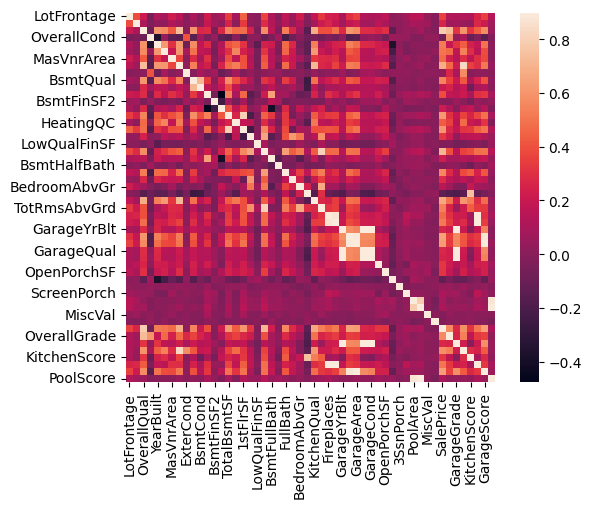

In [ ]:
cormat = train.corr()
sns.heatmap(cormat, vmax=.9, square=True);

Heatmap of the correlation matrix to give some sense of which variables are associated with each other

In [ ]:
featureArr = cormat[abs(cormat['SalePrice']) > 0.5]['SalePrice']
round(featureArr.sort_values(ascending = False), 2)

SalePrice         1.00
OverallQual       0.79
GrLivArea         0.71
ExterQual         0.68
KitchenQual       0.66
GarageCars        0.64
GarageScore       0.63
GarageArea        0.62
TotalBsmtSF       0.61
1stFlrSF          0.61
ExterGrade        0.58
OverallGrade      0.57
FullBath          0.56
BsmtQual          0.55
TotRmsAbvGrd      0.53
YearBuilt         0.52
FireplaceQu       0.51
YearRemodAdd      0.51
FireplaceScore    0.50
Name: SalePrice, dtype: float64

Filtered the correlation matrix by the features with a very positive/negative correlation with SalePrice. Filtered by 0.6 as a baseline for variables to get a sense of the highest correlated varaibles

In [ ]:
multicolMat = cormat.filter(items=featureArr.keys()).filter(axis = 0, items=featureArr.keys())
multicolMat = 1/(1-multicolMat**2)
round(multicolMat,2)

OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  \
OverallQual             inf       1.56          1.49       2.16      1.59   
YearBuilt              1.56        inf          1.60       1.58      1.48   
YearRemodAdd           1.49       1.60           inf       1.58      1.32   
ExterQual              2.16       1.58          1.58        inf      1.39   
BsmtQual               1.59       1.48          1.32       1.39       inf   
TotalBsmtSF            1.43       1.20          1.10       1.29      1.50   
1stFlrSF               1.30       1.11          1.06       1.19      1.08   
GrLivArea              1.49       1.06          1.11       1.23      1.11   
FullBath               1.39       1.29          1.27       1.29      1.13   
KitchenQual            1.84       1.40          1.61       2.06      1.31   
TotRmsAbvGrd           1.18       1.01          1.04       1.08      1.03   
FireplaceQu            1.30       1.06          1.05       1.14      1.09   
GarageCars             1.56       1.41          1.22       1.38      1.22   
GarageArea             1.47       1.30          1.16       1.34      1.18   
SalePrice              2.67       1.38          1.35       1.87      1.42   
OverallGrade           2.12       1.04          1.28       1.28      1.15   
ExterGrade             1.56       1.23          1.41       3.29      1.21   
FireplaceScore         1.22       1.03          1.03       1.09      1.07   
GarageScore            1.49       1.32          1.17       1.35      1.19   

                TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  KitchenQual  \
OverallQual            1.43      1.30       1.49      1.39         1.84   
YearBuilt              1.20      1.11       1.06      1.29         1.40   
YearRemodAdd           1.10      1.06       1.11      1.27         1.61   
ExterQual              1.29      1.19       1.23      1.29         2.06   
BsmtQual               1.50      1.08       1.11      1.13         1.31   
TotalBsmtSF             inf      2.79       1.25      1.12         1.23   
1stFlrSF               2.79       inf       1.46      1.16         1.18   
GrLivArea              1.25      1.46        inf      1.66         1.23   
FullBath               1.12      1.16       1.66       inf         1.21   
KitchenQual            1.23      1.18       1.23      1.21          inf   
TotRmsAbvGrd           1.09      1.18       2.89      1.39         1.08   
FireplaceQu            1.13      1.19       1.29      1.10         1.13   
GarageCars             1.24      1.24       1.31      1.30         1.31   
GarageArea             1.31      1.32       1.31      1.20         1.29   
SalePrice              1.60      1.58       2.01      1.46         1.77   
OverallGrade           1.10      1.08       1.18      1.08         1.31   
ExterGrade             1.15      1.11       1.15      1.17         1.58   
FireplaceScore         1.15      1.24       1.31      1.07         1.09   
GarageScore            1.31      1.33       1.31      1.20         1.30   

                TotRmsAbvGrd  FireplaceQu  GarageCars  GarageArea  SalePrice  \
OverallQual             1.18         1.30        1.56        1.47       2.67   
YearBuilt               1.01         1.06        1.41        1.30       1.38   
YearRemodAdd            1.04         1.05        1.22        1.16       1.35   
ExterQual               1.08         1.14        1.38        1.34       1.87   
BsmtQual                1.03         1.09        1.22        1.18       1.42   
TotalBsmtSF             1.09         1.13        1.24        1.31       1.60   
1stFlrSF                1.18         1.19        1.24        1.32       1.58   
GrLivArea               2.89         1.29        1.31        1.31       2.01   
FullBath                1.39         1.10        1.30        1.20       1.46   
KitchenQual             1.08         1.13        1.31        1.29       1.77   
TotRmsAbvGrd             inf         1.13        1.15        1.12       1.40   
FireplaceQu   

Checking correlation matrix with features with high association to check for multicollinearity.

Manually calculated VIF for each pair of vaiables using our correlation matrix filtering on the features what we found previously.

In [ ]:
vifMat = 1/(1-cormat**2)
multiColMat3 = vifMat
multiPair = set()
for key in multiColMat3.keys():
  for key2 in multiColMat3[key].keys():
    if key != key2 and multiColMat3.at[key, key2] > 3:
      multiPair.add(tuple(sorted([key, key2]) + [round(multiColMat3.at[key, key2], 2)]))
multiPair

{('ExterGrade', 'ExterQual', 3.29),
 ('FireplaceQu', 'FireplaceScore', 5.35),
 ('FireplaceQu', 'Fireplaces', 4.33),
 ('FireplaceScore', 'Fireplaces', 21.43),
 ('GarageArea', 'GarageCars', 4.81),
 ('GarageArea', 'GarageScore', 57.41),
 ('GarageCars', 'GarageScore', 4.33),
 ('GarageCond', 'GarageGrade', 17.98),
 ('GarageCond', 'GarageQual', 16.19),
 ('GarageCond', 'GarageYrBlt', 17.49),
 ('GarageGrade', 'GarageQual', 22.0),
 ('GarageGrade', 'GarageYrBlt', 6.74),
 ('GarageQual', 'GarageYrBlt', 16.0),
 ('PoolArea', 'PoolScore', 4.32),
 ('PoolQC', 'PoolScore', 6.18)}

These are the pairs which show a multicolinearity over all cells. I show pairs of predictors which have a high VIF of above 3.

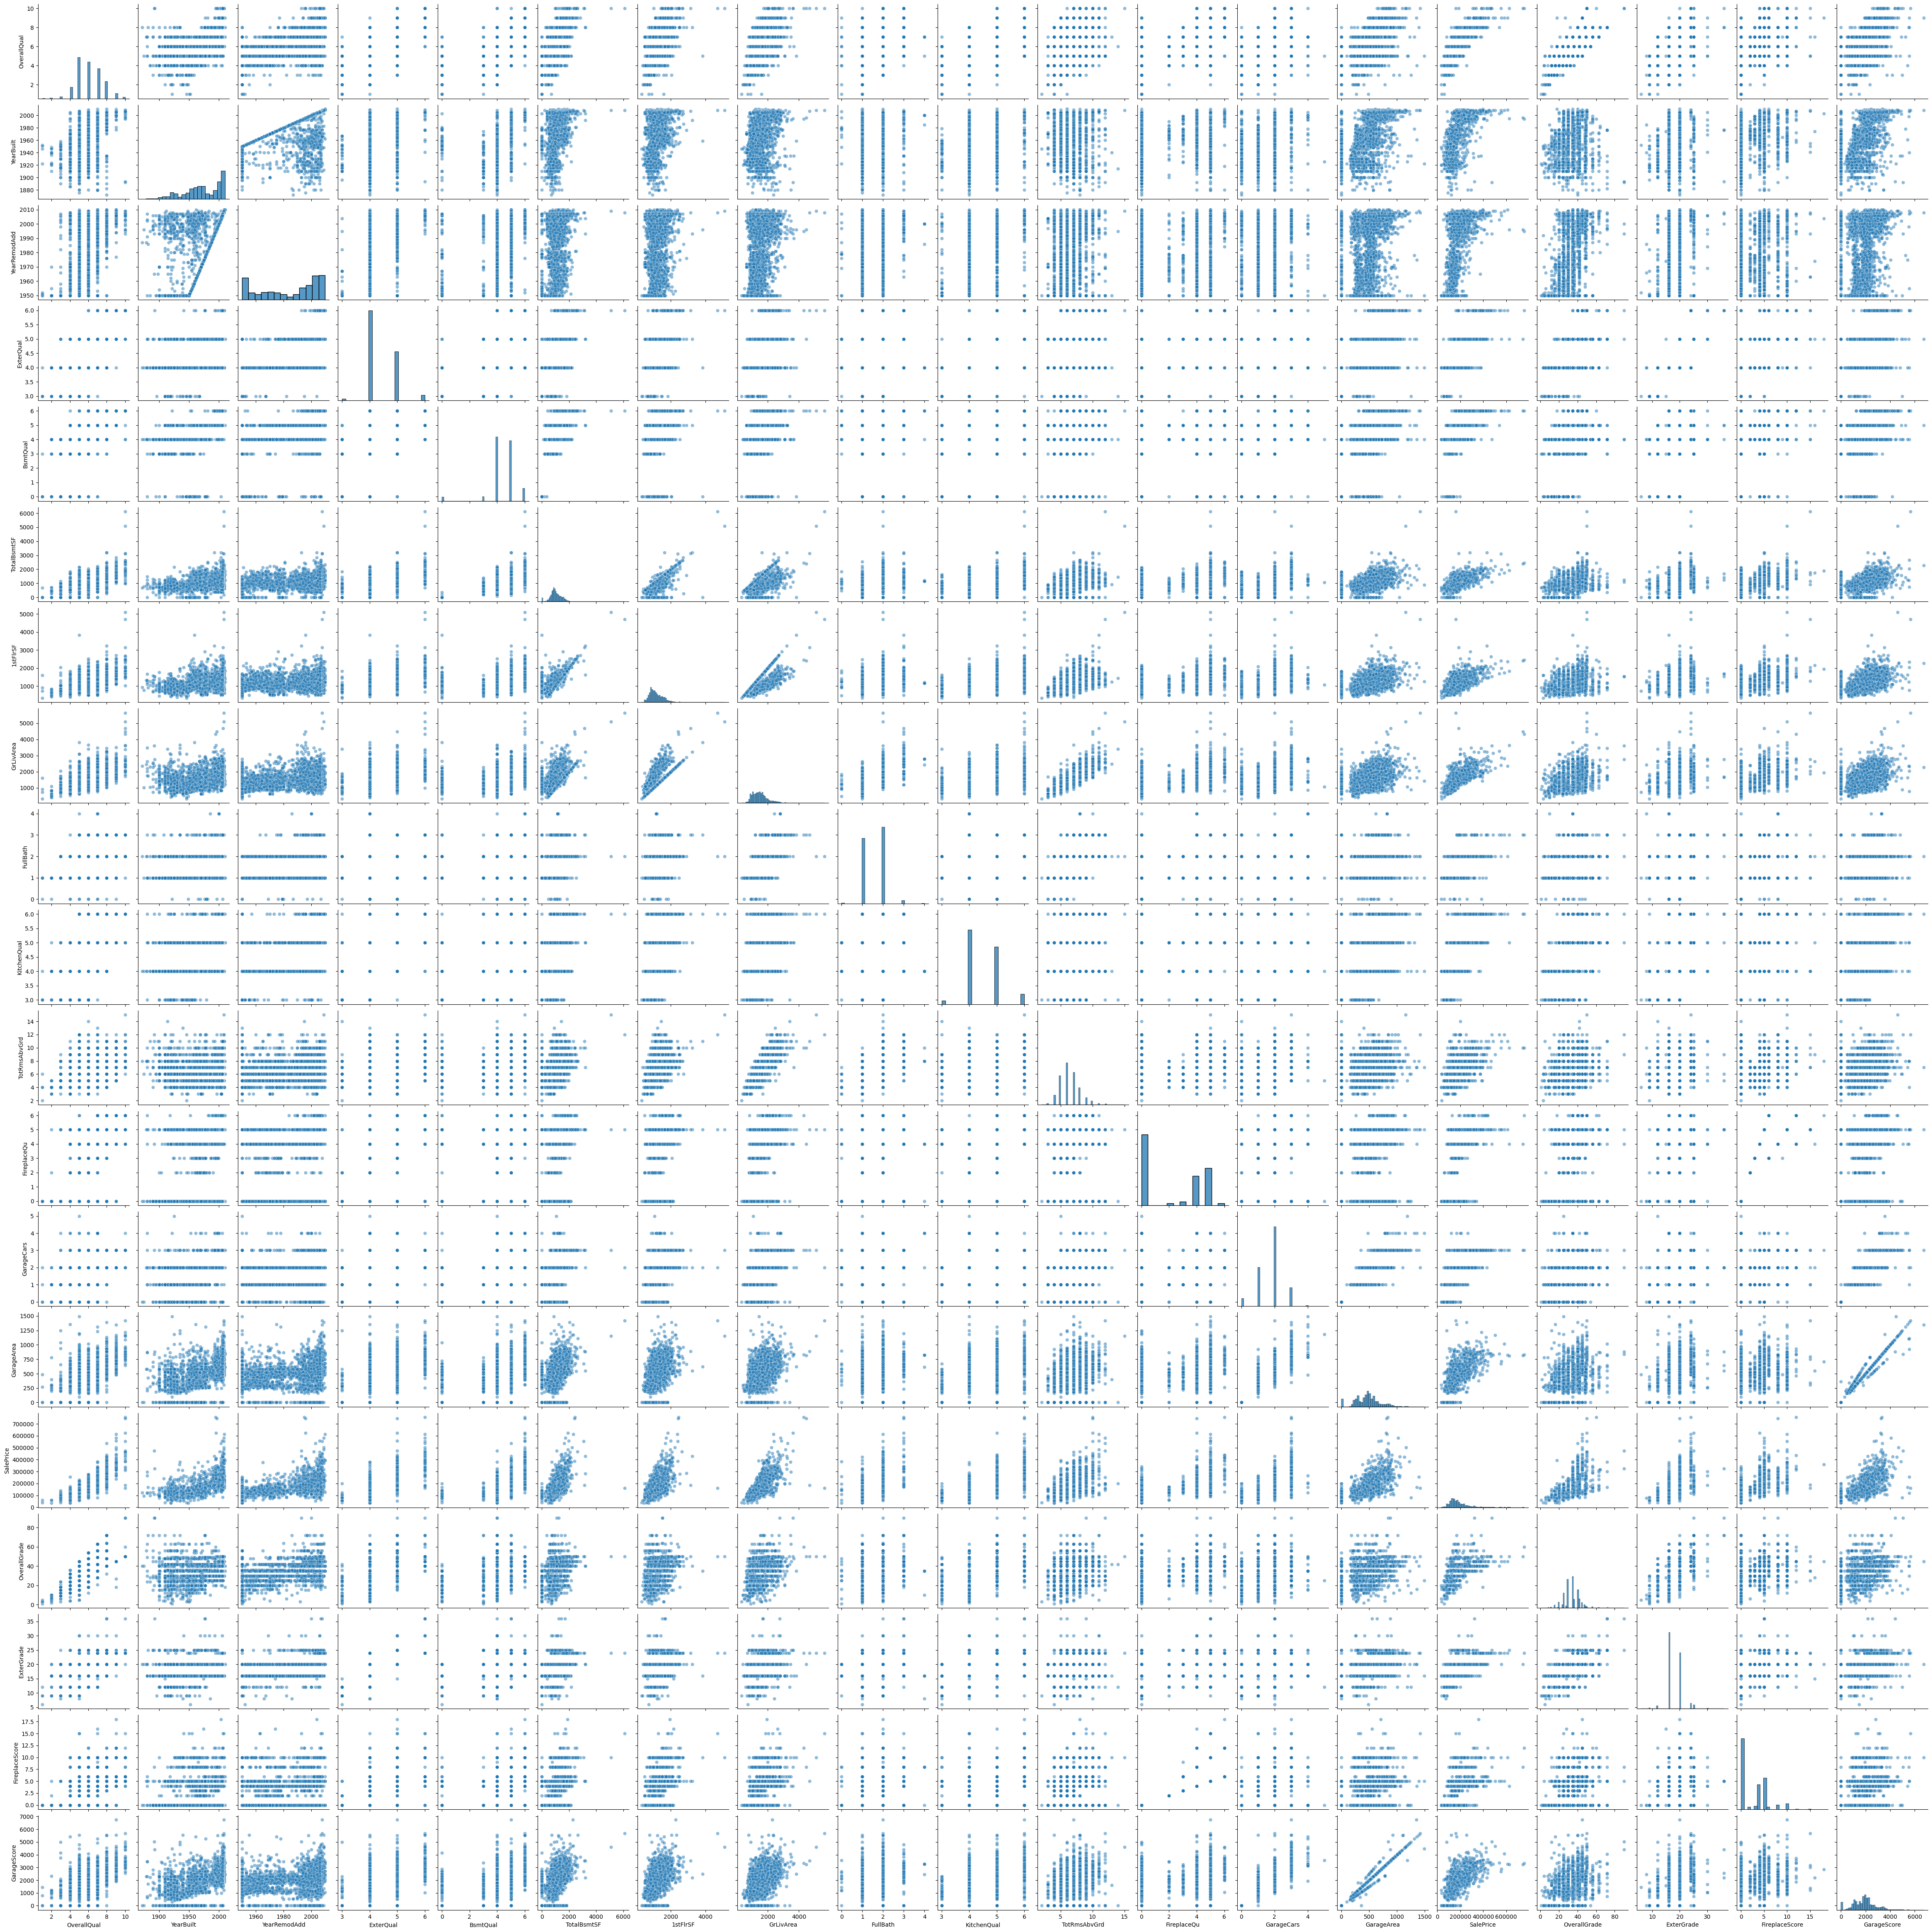

In [ ]:
sns.pairplot(train[featureArr.keys()], height = 2.5, plot_kws=dict(alpha=0.5))
plt.show()

Visualizing the scatterplots of each of the features vs SalePrice and the histograms of themselves using pairplot. I notice that there are a few outliers. Each variable doesn't seem too skewed so I will not transform any variables until I look at the distribution of the residuals.

We can notice clear linear relationships in some of the plots. For example, YearBuilt and YearRemodAdd seems like they have a linear relationship in half the data points which makes sense as they are equal if the house isn't remodeled. We can also see that the graphs that are correlated in this way are what we had calculated with the VIF matrix. We can adjust features when it comes to interpreting our model.

The multicolinearity is only within the variables describing the same feature however, such as the garage features. This makes our analysis still managable even without doing any further adjustments.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
quant_var = train.dtypes[train.dtypes != "object"].index
quant_var = quant_var.drop('SalePrice')

Added the new transformed quantitative variables to the table.

In [ ]:
skew_features = train[quant_var].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
for i in skew_index:
    train[i], _ = stats.boxcox((train[i]+1))

Making skew independent variables normal for potential polynomial regression. This is done for each variable with skew > 0.5

In [ ]:
train = pd.get_dummies(train).reset_index(drop=True)
quant_var = train.dtypes[train.dtypes != "object"].index
quant_var = quant_var.drop('SalePrice')

Making dummy variables for categorical variables. Reassigning the quantatitive variable.

In [ ]:
# Splitting the test and train data again as I had combined them earlier for feature manipulation.
test, train  = train[lenTrain:], train[:lenTrain]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[quant_var], train['SalePrice'], test_size = 0.3, random_state = 10)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
residuals = y_test - predictions
math.sqrt(mean_squared_error(predictions, y_test))

59547.27114337067

This is the current RMSE with the data. It seems quite large, so I will look at the residual graphs.

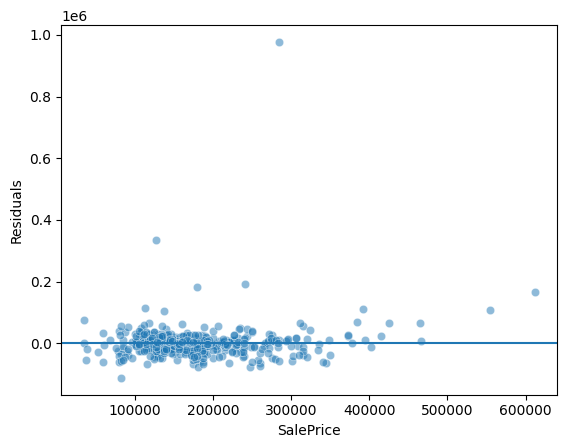

In [ ]:
residuals = residuals.rename('Residuals')
residualsGraph = pd.concat([train['SalePrice'], residuals], axis = 1)
residualsGraph
sns.scatterplot(x = 'SalePrice', y = 'Residuals', data = residualsGraph, alpha = 0.5)
plt.axhline(y=0)

Doing some a MLR with no adjustments, we get the following residual plots. Some things that we notice:
- 1: Variance of errors seems to be increasing as SalePrice increases
- 2: Variance of residuals is decreasing as SalePrice increases
- 3: There are clear outliers in the data - houses that are sold for very cheap.

I will look at the qq plot for deeper insight about the distribution of the data.

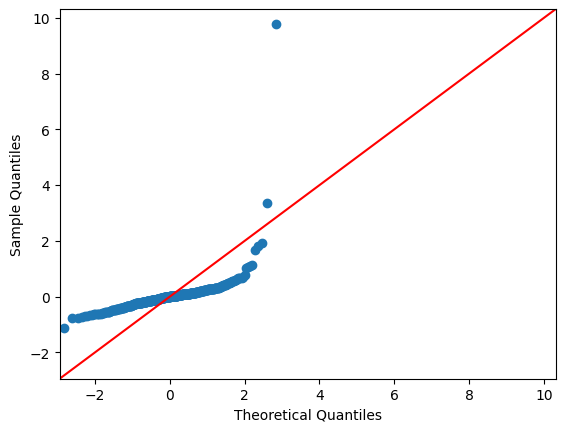

In [ ]:
sm.qqplot(residuals/100000, line = '45')
plt.show()

QQ plot of the residuals. We can see from this that the errors of the residual are not uniformly normal across SalePrice.

I will address these issues by getting rid of some outliers and transforming the response variable.

In [ ]:
train = train[train['GrLivArea'] < 4000]

Addressing the outliers. The author of the data recommends removing any houses with more than 4000 square feet.

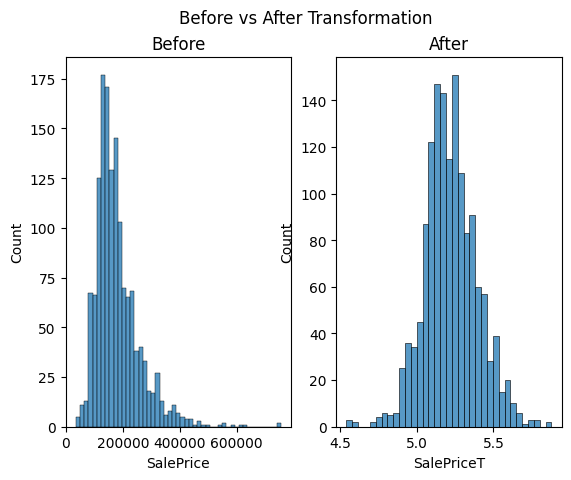

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Before vs After Transformation')
axes[0].set_title('Before')
sns.histplot(ax = axes[0], data=train, x="SalePrice")
train['SalePriceT'] = np.log10(train['SalePrice'])
axes[1].set_title('After')
sns.histplot(ax = axes[1], data=train, x="SalePriceT")
plt.show()

Addressing the constant error assumption, I carried out a log transformation of the response variable so that the errors are more normal.

The distribution of SalePrice now looks a lot more normal.

The variance of the  residuals is still increasing with SalePrice. The variance of the errors seems to be fixed however. This suggests that there is more than just a linear relationship between SalePrice and the variables used.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[quant_var], train['SalePriceT'], test_size = 0.3, random_state = 10)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
RMSE = math.sqrt(mean_squared_error((10**y_test), (10**predictions)))
RMSE

27699.14747181257

This is the current RMSE with basic linear regression with the normalized predictor variable and independent variables. Now I will train different models in the next section.

I will scale and make the pipline when training my models.


## Step 5: Pipeline and Model Selection

In [264]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor

In [ ]:
def RMSE (y, y_pred):
  return math.sqrt(mean_squared_error(10**y, 10**y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[quant_var], train['SalePriceT'], test_size = 0.5, random_state = 42)
#train is the training set
#test is the validation set

In [ ]:
# RMSE using validation data that was manually split earlier.
def RMSE_validate(model):
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  return RMSE(predict, y_test)

In [ ]:
# Returns the 5-fold RMSE. Had to do it manually with the prediction fuction as I had transformed my response variable.
def cv_rmse(model):
    crossV = cross_val_predict(model, X_train, y_train , cv=kf)
    return RMSE(y_train, crossV)

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle = True)

In [ ]:
def RMSEmodel(model):
  print("Training 5-Fold CV RMSE: " + str(round(cv_rmse(model),2)))
  print("Test RMSE: " + str(round(RMSE_validate(model),2)))

In [ ]:
#Ridge Regression as we know there are outliers

#alpha values to try
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
RMSEmodel(ridge)

Training 5-Fold CV RMSE: 37091.44
Test RMSE: 28825.11


This is how well ridge regression performs on the data. This is after optimizing for alpha using the RidgeCV model.

I got different pairs of values for my RMSE for my training and validation data based on my test_split size. I did a manual 1D grid search until my RMSE for my validation data was the lowest.

In [332]:
# Didnt use decision tree regressor as the random_forest ensemble includes it.
random_forest = RandomForestRegressor(n_estimators=300,
                          max_depth=10,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          random_state=42)

In [333]:
RMSEmodel(random_forest)

Training 5-Fold CV RMSE: 33191.59
Test RMSE: 32667.72


Random forest performed this well on training data without optimizing for hyperparameters. I will tune this in the next section.

In [ ]:
lasso = make_pipeline(StandardScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
RMSEmodel(lasso)

Training 5-Fold CV RMSE: 44890.34
Test RMSE: 28716.06


In [ ]:
ENet = make_pipeline(StandardScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
RMSEmodel(ENet)

Training 5-Fold CV RMSE: 45323.92
Test RMSE: 28708.75


In [305]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=6000, max_depth=4, min_child_weight=0, gamma=0.6,subsample=0.7, colsample_bytree=0.7, objective='reg:squarederror', nthread=-1, reg_alpha=0.00006, random_state=42)

XGB I found after some research is an ensemble ML algorithm that is constructed from decision tree models. Where trees are added via gradient descent to try and correct for prediction error.

In [301]:
RMSEmodel(xgb)

[17:17:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:59] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Training 5-Fold CV RMSE: 44772.86
[17:22:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Test RMSE: 46974.14


In [298]:
sgd_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', eta0=0.001, random_state=42))

In [299]:
RMSEmodel(sgd_reg)

Training 5-Fold CV RMSE: 57454.3
Test RMSE: 50630.67


In [306]:
stack_gen = StackingCVRegressor(regressors=(lasso, ENet, ridge, random_forest, xgb),
                                meta_regressor=xgb, use_features_in_secondary=True)

In [308]:
# stack_gen.fit(X_train, y_train.values)
# predict = stack_gen.predict(X_test)
# rms = RMSE(predict, y_test)
# rms

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


42407.84827627856

A lot of these models perform very similarly. I tested a stacking regressor, where the main idea is the take the average prediction of several models on different folds similar to cross validation and using those predictions as metafeatures to train a meta model that will give us a prediction.

The output takes too long on Google Collab so I will not be using this model.
My RMSE  was 42000 without optimization for this model.

## Step 6: Model Tuning

In [310]:
#GridSearch on random forest, ridge, and lasso.

In [309]:
# RidgeCV does the search already
RMSEmodel(ridge)

Training 5-Fold CV RMSE: 37091.44
Test RMSE: 28825.11


In [358]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_grid = {
      'n_estimators': randint(low=100, high=500),
        'max_features': randint(low=100, high=400),
}
forest_reg = RandomForestRegressor(min_samples_split=5,min_samples_leaf=5, max_depth=10, random_state=42)
grid_search = RandomizedSearchCV(forest_reg, rf_grid, cv=5, n_iter = 10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=5,
                                                   min_samples_split=5,
                                                   random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79fd50c81660>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79fd50c80fd0>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [359]:
grid_search.best_params_

{'max_features': 112, 'n_estimators': 164}

In [360]:
RMSEmodel(grid_search.best_estimator_)

Training 5-Fold CV RMSE: 32689.87
Test RMSE: 32513.77


In [338]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [339]:
features = grid_search.best_estimator_.feature_importances_
sorted(zip(features, quant_var), reverse = True)[:15]

[(0.5258720006093784, 'OverallQual'),
 (0.10167466685616294, 'GrLivArea'),
 (0.04688363976956179, 'GarageCars'),
 (0.0393974351473477, 'GarageScore'),
 (0.03742948150126236, 'OverallGrade'),
 (0.028985059718821905, 'TotalBsmtSF'),
 (0.02726855940121758, '1stFlrSF'),
 (0.01957454707929317, 'GarageArea'),
 (0.017092462118474743, 'BsmtFinSF1'),
 (0.014534611858789499, 'LotArea'),
 (0.012347066441474637, 'YearBuilt'),
 (0.01031277338229503, 'YearRemodAdd'),
 (0.007964390656819982, 'MSZoning_RM'),
 (0.007948595338602336, 'GarageYrBlt'),
 (0.007076622805348207, 'ExterQual')]

Top features when it comes to importance.

In [351]:
lass_grid = [{'alpha': [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]}]
lass = Lasso(alpha =0.0005, random_state=42, max_iter= 10000)
lass_grid_search = GridSearchCV(lass, lass_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
scale = StandardScaler().fit(X_train)
X_trainT = scale.transform(X_train)
lass_grid_search.fit(X_trainT, y_train)

GridSearchCV(cv=5,
             estimator=Lasso(alpha=0.0005, max_iter=10000, random_state=42),
             param_grid=[{'alpha': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01]},
                         {}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [352]:
lass_grid_search.best_estimator_

Lasso(alpha=0.001, max_iter=10000, random_state=42)

In [353]:
RMSEmodel(lass_grid_search.best_estimator_)

Training 5-Fold CV RMSE: 55092.9
Test RMSE: 31762.72


## Step 7: Solution Presentation


My lowest RMSE

Theres a lot of factors that go into housing prices. Every predictor matters when it comes to predicting the right price. Even taking out variables that some seem that important or redundant will result in a worse prediction.

Therefore, in order to make more accurate predictions, I believe that the collection of more features can make these predictions even more accurate as opposed to overloading the model with information.

Examples of extra features that could be collected include the education quality of the area, the distance to the nearest hospital, and so on.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!